In [1]:
import os

import cv2
import numpy as np

from matplotlib import pyplot as plt

In [12]:
max_intensity = 255
no_intensity = 0

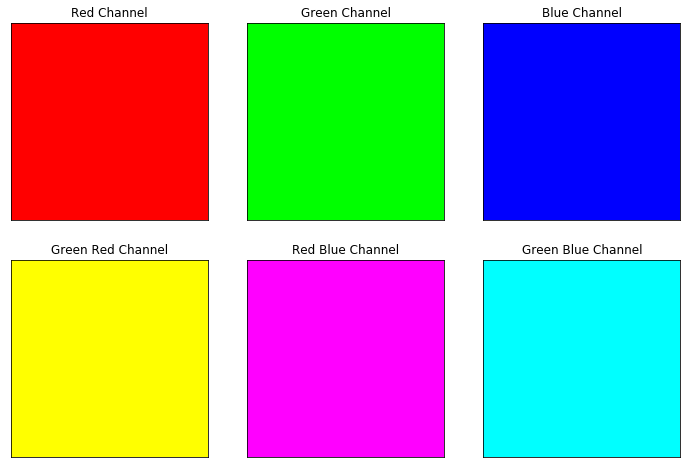

In [13]:
channel_names = ['Red', 'Green', 'Blue']
combinations = [[0, 0], [1, 1], [2, 2], 
                [0, 1], [0, 2], [1, 2]]

rows = 2
cols = 3

fig = plt.figure(figsize=(12, 8))
for ix, (row, col) in enumerate(combinations):
        colors = set([channel_names[row], channel_names[col]])
        
        channel_color = ''
        for color in colors:
            channel_color += f'{color} '
        channel_color += 'Channel'
        
        image = np.zeros((3, 244, 244)).astype(np.uint16)
        image[row, :] = max_intensity
        image[col, :] = max_intensity
        
        ax = fig.add_subplot(rows, cols, ix+1)
        ax.imshow(image.T)
        ax.set_title(channel_color)
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
    
plt.show()

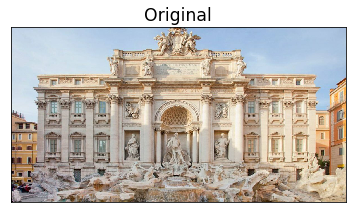

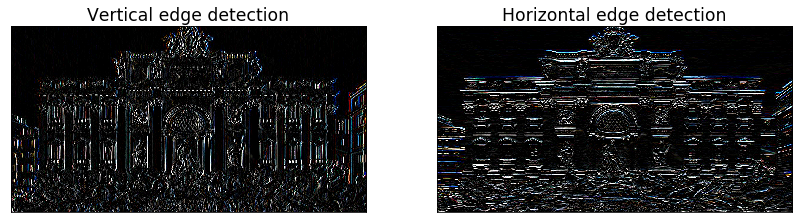

In [14]:
fontdict = {
    'fontsize': 'xx-large',
    'family': 'sans'
}

image_name = '385_fontana di trevi.jpg'
image_dir = os.path.join('data', 'dataset', 'index', 'fontana di trevi')
image_file = os.path.join(image_dir, image_name)
img = cv2.imread(image_file)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

vertical_edge_detection = np.array([[-1,0,1],
                                    [-2,0,2],
                                    [-1,0,1]])
horizontal_edge_detection = np.array([[1,2,1],
                                      [0,0,0],
                                      [-1,-2,-1]])
kernels = [
    ('Vertical edge detection', vertical_edge_detection), 
    ('Horizontal edge detection', horizontal_edge_detection)
]

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
ax.imshow(img)
ax.set_title('Original', fontdict=fontdict)
ax.set_xticks([])
ax.set_yticks([])

fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(121)
ax.imshow(cv2.filter2D(img, -1, kernels[0][1]))
ax.set_title(kernels[0][0], fontdict=fontdict)
ax.set_xticks([])
ax.set_yticks([])

ax = fig.add_subplot(122)
ax.imshow(cv2.filter2D(img, -1, kernels[1][1]))
ax.set_title(kernels[1][0], fontdict=fontdict)
ax.set_xticks([])
ax.set_yticks([])

plt.show()

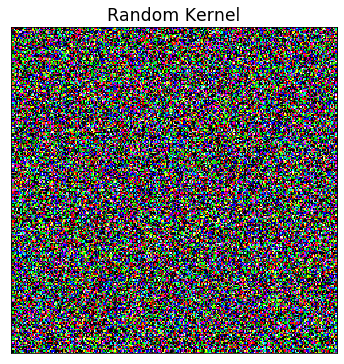

In [26]:
# Display a noisy/random image
image_shape = (244,244,3)
# image = np.random.randint(no_intensity, max_intensity, size=image_shape)
image = np.random.randn(*image_shape)
mean, std = [image.mean(), image.std()]
image -= mean
image /= std
image = image.clip(0, 1)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Random Kernel', fontdict=fontdict)
ax.imshow(image)
plt.show()